In [1]:
### import shapely                 #needed to set geopandas geometry 
from shapely.wkt import loads  #needed to set geopandas geometry
import pandas as pd            #for DataFrame and analysis
import numpy as np
import geopandas as gpd        #for mapping and spatial aggregation
import matplotlib.pyplot as plt  #use matplotlib to modify the plots (e.g. make them larger) 
import seaborn as sb             #for data viz
import palettable.colorbrewer.sequential as pcs #for choropleth maps
import libpysal as lps
import statsmodels.formula.api as smf  #for regression
import scipy.stats as ss 
import pysal as ps
from pysal.model import spreg
from spreg import ols
from spreg import ML_Error
from spreg import ML_Lag
import os
import urllib
import zipfile
import sys
from libpysal.weights import Queen, Rook
import pysal.viz as viz
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import osmnx as ox
ox.config(log_file=True, log_console=True, use_cache=True)
import networkx as nx

In [2]:
df = pd.read_csv("C:/Users/samue/OneDrive - King's College London/Desktop/KCL Y3/Dissertation/1 Datasets/Python/Master (LSOA).csv", encoding= "unicode_escape") 

In [3]:
gdf = gpd.GeoDataFrame(df)  #geopandas
gdf['geometry'] = gdf['geometry'].apply(lambda x: loads(x))  #from shapely
gdf = gdf.set_geometry('geometry')

In [4]:
gdf['proximity'].describe()

count     4835.000000
mean      4668.895924
std       1596.827486
min       1317.633394
25%       3493.654282
50%       4339.082733
75%       5537.487352
max      13041.712640
Name: proximity, dtype: float64

In [5]:
gdf['proximity'].quantile(0.9)

6883.036009800002

In [6]:
gdf['variety'].describe()

count    4835.000000
mean        0.332989
std         0.692158
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: variety, dtype: float64

In [7]:
gdf['variety'].quantile(0.1)

0.0

In [8]:
gdf['density'].describe()

count    4835.000000
mean        0.347673
std         0.797773
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        23.000000
Name: density, dtype: float64

In [9]:
gdf['density'].quantile(0.1)

0.0

In [10]:
#Identifying the bottom 10% performing LSOAs for all 3 dimensions of accessibility to identify Food Deserts

In [11]:
gdf['proximity'].quantile(0.75)

5537.487352

In [12]:
gdf25 = gdf[(gdf['proximity'] >= 5537.487352) & (gdf['variety'] <= 0.00) & (gdf['density'] <= 0.00) ]

In [13]:
gdf25.describe()

,X,Y,>65,POPDEN (km2),AREA (m^2),EthWhite,EthMixed,EthAsian,EthBlack,UnE,...,Amaz_Delivery,Wait_Delivery,Ocad_Delivery,Total Del,proximity,nearest budget,nearest mid,nearest premium,variety,density
count,971.000000,971.000000,971.000000,971.000000,9.710000e+02,971.000000,971.000000,971.000000,971.000000,971.000000,...,971.000000,971.0,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.0,971.0
mean,-0.148502,51.497449,260.266735,0.649256,6.103937e+05,0.659910,0.043231,0.121697,0.164763,0.069270,...,0.497425,1.0,0.996910,7.477858,6927.036342,2447.262711,1518.102470,2031.216773,0.0,0.0
std,0.201681,0.093108,89.155106,0.432706,1.242725e+06,0.207109,0.018546,0.116928,0.158409,0.031645,...,0.500251,0.0,0.055527,0.514004,1216.529984,1600.717055,1077.628817,1378.536201,0.0,0.0
min,-0.489280,51.293820,46.000000,0.012263,5.540000e+04,0.035438,0.006415,0.001365,0.007519,0.016000,...,0.000000,1.0,0.000000,6.000000,5537.980971,107.415000,127.197000,0.000000,0.0,0.0
25%,-0.325660,51.420855,197.000000,0.337839,2.073500e+05,0.521340,0.029869,0.037884,0.057388,0.044000,...,0.000000,1.0,1.000000,7.000000,5977.616416,1287.983000,871.781000,1029.353000,0.0,0.0
50%,-0.140080,51.500160,249.000000,0.576909,3.023000e+05,0.702304,0.041697,0.079863,0.112296,0.064000,...,0.000000,1.0,1.000000,7.000000,6573.999537,2058.586000,1291.317000,1603.921000,0.0,0.0
75%,0.019411,51.572300,314.000000,0.865407,5.003500e+05,0.825776,0.053937,0.166553,0.212441,0.089000,...,1.000000,1.0,1.000000,8.000000,7588.389049,3168.496500,1819.138500,2679.074500,0.0,0.0
max,0.302259,51.681000,756.000000,2.925993,1.579730e+07,0.981591,0.113693,0.967918,0.868955,0.183000,...,1.000000,1.0,1.000000,8.000000,13041.712640,9640.216000,9614.616000,6995.640000,0.0,0.0


In [14]:
gdf25.to_csv(r'gdf25.csv', index=False)

<AxesSubplot:>

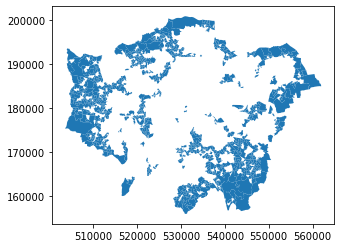

In [15]:
gdf25.plot()

In [16]:
gdf10 = gdf[(gdf['proximity'] >= 6883.036009800002) & (gdf['variety'] <= 0.00) & (gdf['density'] <= 0.00) ]

In [17]:
gdf10.describe()

,X,Y,>65,POPDEN (km2),AREA (m^2),EthWhite,EthMixed,EthAsian,EthBlack,UnE,...,Amaz_Delivery,Wait_Delivery,Ocad_Delivery,Total Del,proximity,nearest budget,nearest mid,nearest premium,variety,density
count,393.000000,393.000000,393.000000,393.000000,3.930000e+02,393.000000,393.000000,393.000000,393.000000,393.000000,...,393.000000,393.0,393.0,393.000000,393.000000,393.000000,393.000000,393.000000,393.0,393.0
mean,-0.171220,51.475040,259.557252,0.559647,7.547702e+05,0.691313,0.040720,0.114417,0.146466,0.069567,...,0.440204,1.0,1.0,7.437659,8113.717782,2854.258720,1763.728036,2305.045751,0.0,0.0
std,0.214988,0.098251,86.028783,0.374230,1.530357e+06,0.194806,0.016996,0.119982,0.144079,0.032355,...,0.497044,0.0,0.0,0.501840,1039.098673,1974.964322,1428.182787,1628.640810,0.0,0.0
min,-0.489280,51.293820,97.000000,0.014534,7.210000e+04,0.068643,0.006415,0.001365,0.008892,0.019000,...,0.000000,1.0,1.0,6.000000,6884.793289,310.603000,219.999000,192.423000,0.0,0.0
25%,-0.396530,51.400070,197.000000,0.287510,2.274000e+05,0.587198,0.028913,0.034812,0.050499,0.045000,...,0.000000,1.0,1.0,7.000000,7301.761829,1356.032000,912.686000,1037.120000,0.0,0.0
50%,-0.155460,51.487450,245.000000,0.499841,3.388000e+05,0.741846,0.040268,0.074403,0.093590,0.062000,...,0.000000,1.0,1.0,7.000000,7940.718157,2285.928000,1381.275000,1742.215000,0.0,0.0
75%,0.033934,51.533150,314.000000,0.749643,5.983000e+05,0.835583,0.050477,0.146075,0.190645,0.090000,...,1.000000,1.0,1.0,8.000000,8612.832197,3660.837000,2021.813000,3156.599000,0.0,0.0
max,0.280596,51.678740,531.000000,2.341193,1.579730e+07,0.981591,0.110590,0.967918,0.749495,0.183000,...,1.000000,1.0,1.0,8.000000,13041.712640,9640.216000,9614.616000,6995.640000,0.0,0.0


In [18]:
gdf10.to_csv(r'gdf10.csv', index=False)

<AxesSubplot:>

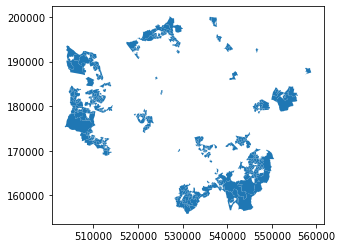

In [19]:
gdf10.plot()